## Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#### Loading the Data

In [2]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\CB\ALX\Data Science\Integrated Exams\Part 2\data_exam_part_II\rand-dollar.csv', index_col= 0)
df.head()

df.info()
df.describe().T

#Checking for null values
#df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2008M01 to 2017M12
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ZAR/USD                                  120 non-null    float64
 1   Value of Exports (USD)                   120 non-null    float64
 2   Value of Exports (ZAR)                   120 non-null    float64
 3   Value of Imports (USD)                   120 non-null    float64
 4   Value of Imports (ZAR)                   120 non-null    float64
 5   IMF Reserve Position (USD)               120 non-null    float64
 6   Foreign Exchange (USD)                   120 non-null    float64
 7   Claims on Non-residents (USD)            120 non-null    float64
 8   Liabilities to Non-residents (USD)       120 non-null    float64
 9   Savings Rate                             120 non-null    float64
 10  Lending Rate                             120 

,count,mean,std,min,25%,50%,75%,max
ZAR/USD,120.0,10.083667,2.651753,6.74,7.6600,9.820,12.3400,16.37
Value of Exports (USD),120.0,7309.426167,1270.955437,3662.05,6505.7075,7538.735,8074.4500,10142.41
Value of Exports (ZAR),120.0,72584.391250,18333.438410,36251.75,59877.9400,71426.100,87488.5325,116185.99
Value of Imports (USD),120.0,7847.494083,1261.457881,4725.01,6916.1050,7802.220,8922.6675,10589.92
Value of Imports (ZAR),120.0,77969.693000,18870.625678,43062.14,61254.9325,80262.360,95364.1950,115210.99
IMF Reserve Position (USD),120.0,180.203667,241.856486,1.92,2.3275,65.170,193.7075,669.17
Foreign Exchange (USD),120.0,37743.736167,4044.555006,29526.78,35048.8725,39067.490,41035.3875,42735.00
Claims on Non-residents (USD),120.0,50059.190750,4597.734275,40520.11,47196.5150,50127.570,53244.9300,59702.31
Liabilities to Non-residents (USD),120.0,39189.093917,4051.000202,31683.49,36310.9750,38698.145,41990.3775,48338.35
Savings Rate,120.0,3.637250,1.295459,2.40,2.7000,3.080,4.2450,7.31


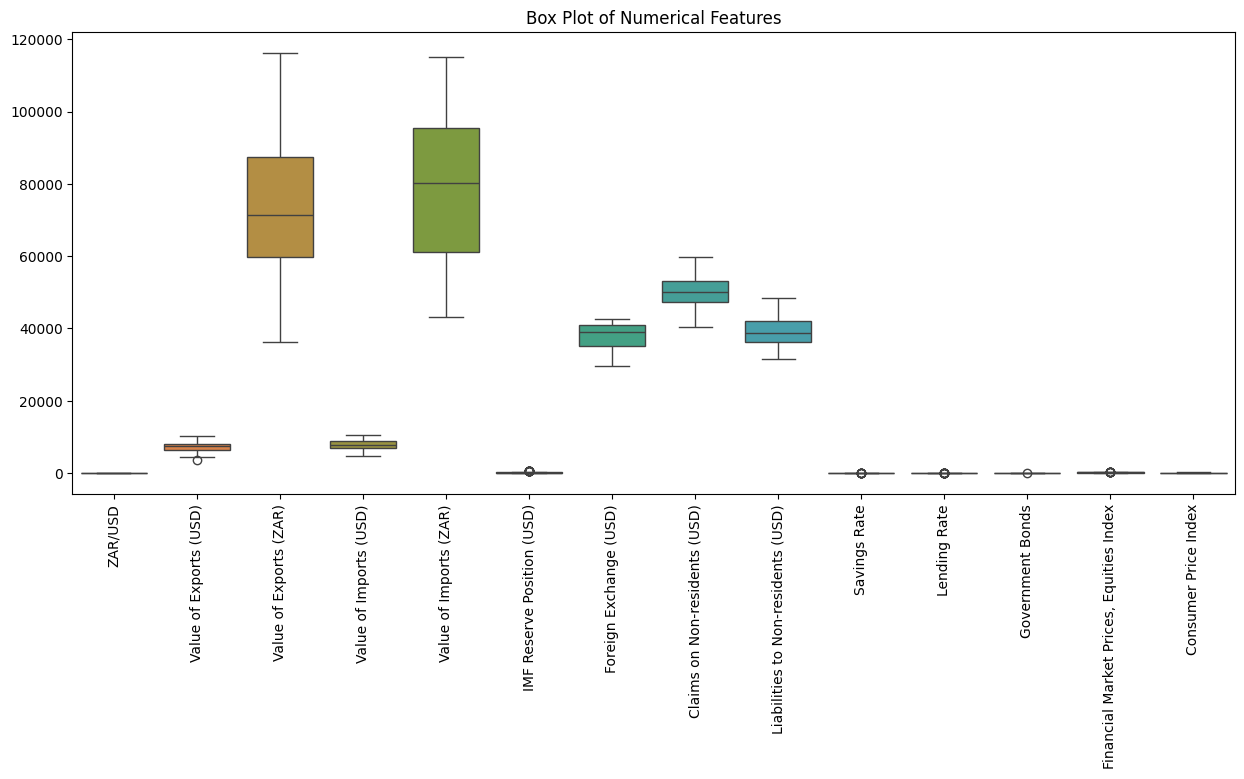

In [3]:
# Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

#### Splitting

In [4]:
target = 'ZAR/USD'
y = df[target]
X = df.drop(columns=target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, shuffle= False)

In [28]:
X_train

,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Savings Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Consumer Price Index
2008M01,5611.90,39356.82,8105.11,56841.94,1.92,29526.78,51547.61,37752.29,4.53,14.50,8.36,312.97,85.48
2008M02,6126.16,46946.33,8159.43,62527.78,2.01,29943.04,59702.31,45927.67,5.61,14.50,8.69,335.09,85.91
2008M03,6417.48,51150.89,8010.87,63851.12,2.05,30246.54,56448.18,42565.17,5.62,14.50,9.16,348.84,87.04
2008M04,7215.71,56174.34,9112.97,70944.49,2.03,30399.21,55534.75,43342.70,5.80,15.00,9.15,358.47,87.61
2008M05,7379.67,56240.45,9090.14,69275.97,2.10,30467.81,57682.89,46533.13,6.50,15.00,9.51,371.98,88.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015M08,6743.95,87132.35,7952.46,102746.45,200.33,38814.96,47123.54,36880.63,2.94,9.50,8.28,162.70,131.77
2015M09,6680.86,90946.99,7230.09,98423.73,201.03,38899.56,48222.98,37716.63,2.89,9.50,8.47,160.51,131.77
2015M10,6292.78,85012.51,8361.15,112955.23,221.00,38711.99,45184.80,36518.11,2.97,9.50,8.28,167.88,132.06
2015M11,6605.46,93237.28,7134.42,100703.58,217.09,38213.30,44665.59,39004.70,3.09,9.75,8.49,166.36,132.34


#### Training the Model

In [6]:
# Select the predictor variable
X_train_exports = X_train[['Value of Exports (ZAR)']]
X_test_exports = X_test[['Value of Exports (ZAR)']]
lm = LinearRegression()
lm.fit(X_train_exports, y_train)

LinearRegression()

##### Question 1 
What is the value of the intercept of the model?

In [7]:
lm.intercept_

3.2941036551619103

##### Question 2
How do we interpret the intercept?

**The value of ZAR/USD will be equal to this value when exports are zero**

##### Question 3
What is the value of the slope of this model?

In [8]:
slope = lm.coef_[0]
print(f'Slope : {slope} = {slope : .8f}')

Slope : 8.677126339792249e-05 =  0.00008677


##### Question 4
How do we interpret the slope of the model?

***An increase of 1 unit in exports results in an increase of this many units in ZAR/USD**

In [9]:
R = pd.DataFrame({'Value of Exports (ZAR)':[100000]})
R_pred = lm.predict(R)

print(f'Predicted Value : {R_pred[0]}')

Predicted Value : 11.97122999495416


##### Question 6
*What is the MSE of the model on the test set?*

In [10]:
y_pred = lm.predict(X_test_exports)

mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')

MSE: 8.22


##### Question 7
What is the R-squared value of the model on the test set?

In [11]:
r2= r2_score(y_test, y_pred)
print(f'R-Squared : {r2:.2f}')

R-Squared : -8.45


##### Question 8
What would a negative R-squared test value imply?

Ans: **The model is worse at predicting the target variable than if a constant line y = intercept was used**

##### Question 9 
What is the predicted value for August 2017?

In [13]:
Aug_17 = df[['Value of Exports (ZAR)']].loc['2017M08'].to_frame().T
Aug_17_pred = lm.predict(Aug_17)

print(f'Predicted value on Aug 2017 : R{Aug_17_pred[0]: .2f}/ 1$')



Predicted value on Aug 2017 : R 12.25/ 1$


##### Question 10
What is the absolute error for this prediction?

In [14]:
y_test = df['ZAR/USD'].loc['2017M08']

AE = np.absolute(y_test - Aug_17_pred[0])

print(f'Absolute Error: R{AE: .2f}')

Absolute Error: R 0.98


#### Original Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, shuffle= False)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, shuffle= False)

#### Question 11
Use the df.corr() function to find the correlations between the predictors and the target variable.

Which variable has the weakest linear relationship with the ZAR/USD exchange rate?

Savings Rate                               0.041555
Lending Rate                               0.056806
Financial Market Prices, Equities Index    0.139858
Government Bonds                           0.191455
Foreign Exchange (USD)                     0.317203
Value of Exports (USD)                     0.335780
Value of Imports (USD)                     0.350606
Liabilities to Non-residents (USD)         0.472230
Claims on Non-residents (USD)              0.727278
Value of Exports (ZAR)                     0.784756
Value of Imports (ZAR)                     0.791994
IMF Reserve Position (USD)                 0.855311
Consumer Price Index                       0.872660
ZAR/USD                                    1.000000
Name: ZAR/USD, dtype: float64

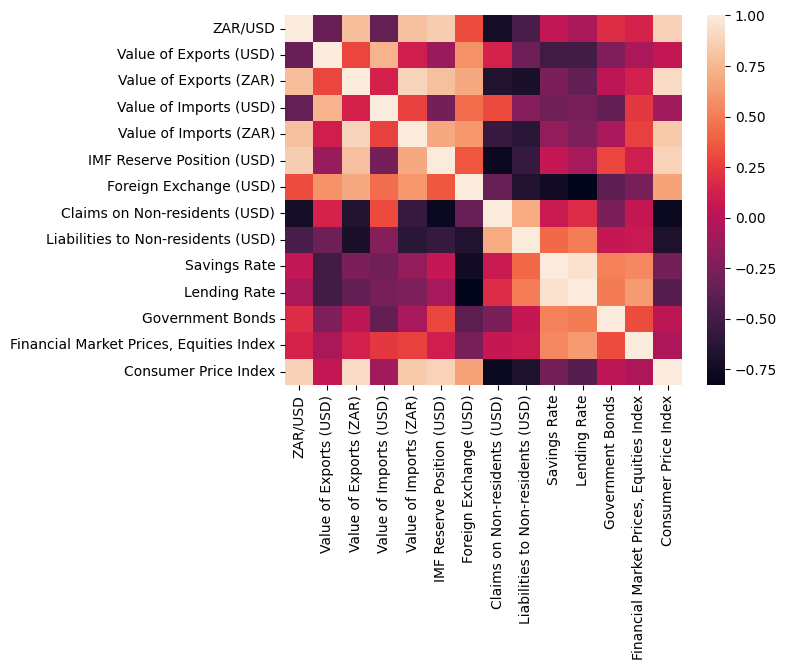

In [17]:
corr = df.corr()

sns.heatmap(corr)

corr['ZAR/USD'].abs().sort_values(ascending= True)

##### Question 12
Which variable has the strongest linear relationship with the ZAR/USD exchange rate?

In [18]:
corr['ZAR/USD'].abs().sort_values(ascending= False)

ZAR/USD                                    1.000000
Consumer Price Index                       0.872660
IMF Reserve Position (USD)                 0.855311
Value of Imports (ZAR)                     0.791994
Value of Exports (ZAR)                     0.784756
Claims on Non-residents (USD)              0.727278
Liabilities to Non-residents (USD)         0.472230
Value of Imports (USD)                     0.350606
Value of Exports (USD)                     0.335780
Foreign Exchange (USD)                     0.317203
Government Bonds                           0.191455
Financial Market Prices, Equities Index    0.139858
Lending Rate                               0.056806
Savings Rate                               0.041555
Name: ZAR/USD, dtype: float64

##### Question 13
Before answering the following questions, make sure to perform the steps outlined below:

Split the original DataFrame into X (features) and y (targets)   
Standardise the entire X matrix   
Create X_train, X_test, y_train, y_test using the same chronological 80/20 split as before   
Train two models, “ridge” and “lasso”, which use ridge regression and LASSO, respectively   
(in the case of the lasso model, set alpha=0.01, use default parameters for the ridge model)  
What is the training MSE of the Ridge model?  



In [20]:
target = 'ZAR/USD'
y = df[target]
X = df.drop(columns=target)

#Standardizing 
scaler = StandardScaler()
X_tranformed = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tranformed,y, test_size= 0.2, shuffle= False)

# Training the Lasso model
lasso = Lasso(alpha= 0.01)
lasso.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

#Predictions
y_pred_lasso = lasso.predict(X_train)
y_pred_ridge = ridge.predict(X_train)

#Accuracy  test 
mse_ridge = mean_squared_error(y_train,y_pred_ridge)
mse_lasso = mean_squared_error(y_train,y_pred_lasso)

print(f'Ridge MSE : {mse_ridge:.3f}')
print(f'Lasso MSE : {mse_lasso:.3f}')

#r2
r2_ridge = r2_score(y_train,y_pred_ridge)
r2_lasso = r2_score(y_train,y_pred_lasso)

print(f'\nRidge r-Squared : {r2_ridge:.4f}')
print(f'Lasso r-Squared : {r2_lasso:.4f}')

Ridge MSE : 0.040
Lasso MSE : 0.047

Ridge r-Squared : 0.9890
Lasso r-Squared : 0.9871


#### Question 15 &16
What is the testing MSE of the Ridge model?
What is the testing MSE of the LASSO model?

In [21]:
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

#Accuracy  test 
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)

print(f'Ridge MSE : {mse_ridge:.3f}')
print(f'Lasso MSE : {mse_lasso:.3f}')

#r2
r2_ridge = r2_score(y_test,y_pred_ridge)
r2_lasso = r2_score(y_test,y_pred_lasso)

print(f'\nRidge r-Squared : {r2_ridge:.4f}')
print(f'Lasso r-Squared : {r2_lasso:.4f}')

Ridge MSE : 0.632
Lasso MSE : 0.579

Ridge r-Squared : 0.2732
Lasso r-Squared : 0.3346


##### Question 17
Based on the values of the Ridge model’s variable coefficients, which indicator is the best predictor of the target variable?


In [22]:
feature_importance = pd.Series(abs(ridge.coef_), index = X.columns)
feature_importance.sort_values(ascending= False)


Value of Exports (ZAR)                     1.061183
Value of Imports (ZAR)                     1.002528
Value of Imports (USD)                     0.736367
Consumer Price Index                       0.630804
Value of Exports (USD)                     0.578656
Lending Rate                               0.525606
Foreign Exchange (USD)                     0.155625
Financial Market Prices, Equities Index    0.112937
Savings Rate                               0.087518
Claims on Non-residents (USD)              0.068125
IMF Reserve Position (USD)                 0.020487
Government Bonds                           0.018772
Liabilities to Non-residents (USD)         0.005712
dtype: float64

##### Question 18
Based on the values of the Ridge model’s variable coefficients, which indicator is the worst predictor of the target variable?

In [23]:
feature_importance = pd.Series(abs(ridge.coef_), index = X.columns)
feature_importance.sort_values(ascending= True)

Liabilities to Non-residents (USD)         0.005712
Government Bonds                           0.018772
IMF Reserve Position (USD)                 0.020487
Claims on Non-residents (USD)              0.068125
Savings Rate                               0.087518
Financial Market Prices, Equities Index    0.112937
Foreign Exchange (USD)                     0.155625
Lending Rate                               0.525606
Value of Exports (USD)                     0.578656
Consumer Price Index                       0.630804
Value of Imports (USD)                     0.736367
Value of Imports (ZAR)                     1.002528
Value of Exports (ZAR)                     1.061183
dtype: float64

##### Question 19 
Based on the values of the LASSO model’s variable coefficients, which indicator is the best predictor of the target variable?

In [24]:
feature_importance = pd.Series(abs(lasso.coef_), index = X.columns)
feature_importance.sort_values(ascending= False)


Value of Imports (ZAR)                     1.171819
Value of Exports (ZAR)                     1.135450
Value of Imports (USD)                     0.816718
Value of Exports (USD)                     0.577647
Consumer Price Index                       0.239314
Lending Rate                               0.209855
Foreign Exchange (USD)                     0.080232
Financial Market Prices, Equities Index    0.030944
Liabilities to Non-residents (USD)         0.030399
IMF Reserve Position (USD)                 0.000000
Claims on Non-residents (USD)              0.000000
Savings Rate                               0.000000
Government Bonds                           0.000000
dtype: float64

##### Question 20
How many variables have coefficients equal to zero in the LASSO model?

In [25]:
sum(lasso.coef_ == 0)

4